In [306]:
import pandas as pd
import numpy as np

### Basic Dataset Info

In [307]:
df = pd.read_csv('adult.csv')

In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [309]:
df.duplicated().sum()

52

In [310]:
df.drop_duplicates(inplace=True)

In [311]:
df.shape

(48790, 15)

In [312]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### Checking for null

In [313]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [314]:
df['educational-num'].isna().sum()

0

In [315]:
df['workclass'].value_counts()

workclass
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [316]:
df['occupation'].value_counts()

occupation
Prof-specialty       6165
Craft-repair         6102
Exec-managerial      6082
Adm-clerical         5606
Sales                5501
Other-service        4919
Machine-op-inspct    3017
?                    2805
Transport-moving     2355
Handlers-cleaners    2071
Farming-fishing      1485
Tech-support         1445
Protective-serv       982
Priv-house-serv       240
Armed-Forces           15
Name: count, dtype: int64

In [317]:
for column in df.columns:
    print(df[column].unique())

[25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86]
['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
[226802  89814 336951 ... 129912 255835 257302]
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
[ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]
['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']
['Own-child' 'Husband' 'Not-

In [318]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48790.000000,4.879000e+04,48790.000000,48790.000000,48790.000000,48790.000000
mean,38.652798,1.896690e+05,10.078807,1080.217688,87.595573,40.425886
std,13.708493,1.056172e+05,2.570046,7455.905921,403.209129,12.392729
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781385e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376062e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


### Dropping and Filling NaN

In [319]:
df.replace('?', np.nan, inplace= True)

In [320]:
df.isna().sum()

age                   0
workclass          2795
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2805
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      856
income                0
dtype: int64

In [321]:
df.dropna(subset=['occupation'], inplace=True)

In [322]:
df.isna().sum()

age                  0
workclass            0
fnlwgt               0
education            0
educational-num      0
marital-status       0
occupation           0
relationship         0
race                 0
gender               0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     810
income               0
dtype: int64

In [323]:
native_country_mode = df['native-country'].mode()[0]
df[['native-country']] = df[['native-country']].fillna(native_country_mode)

In [324]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [325]:
df.to_csv('adult(no missing value).csv')

### Checking Skewness

In [326]:
numeric_columns = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

<Axes: >

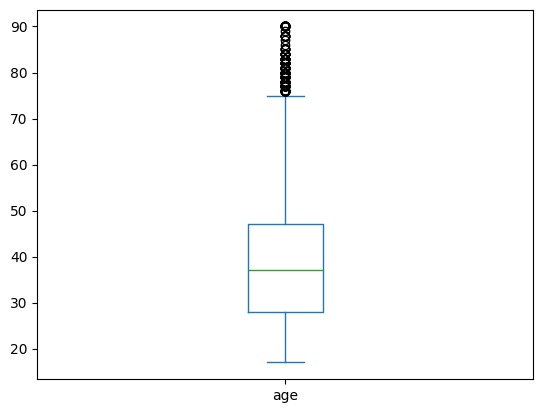

In [327]:
df['age'].plot(kind='box')

<Axes: >

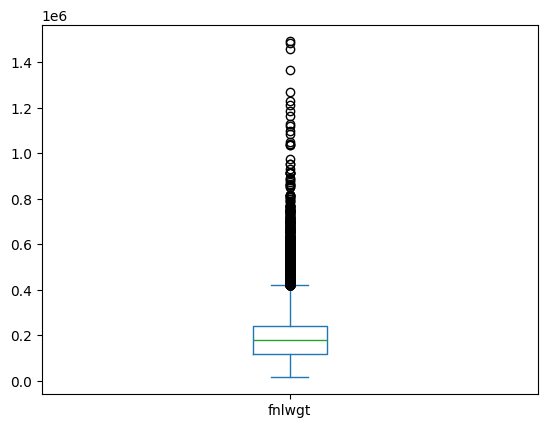

In [328]:
df['fnlwgt'].plot(kind='box')

<Axes: >

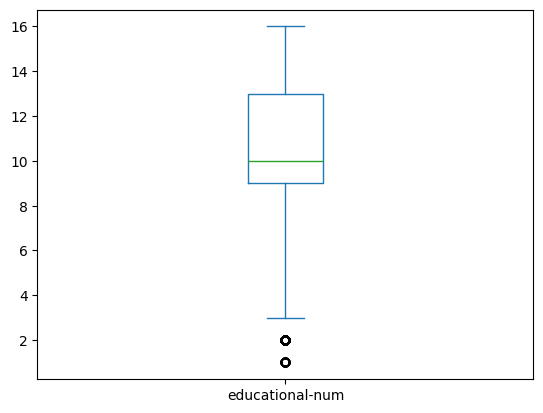

In [329]:
df['educational-num'].plot(kind="box")

<Axes: >

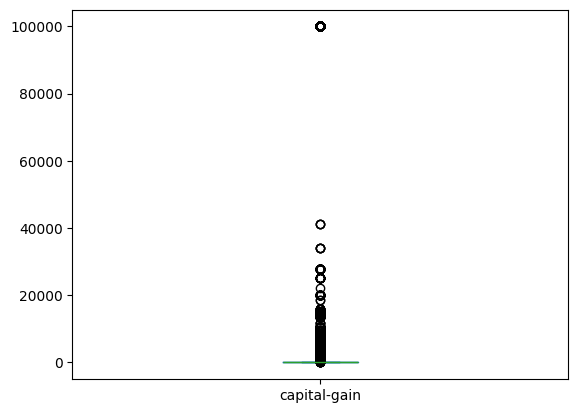

In [330]:
df['capital-gain'].plot(kind="box")

<Axes: >

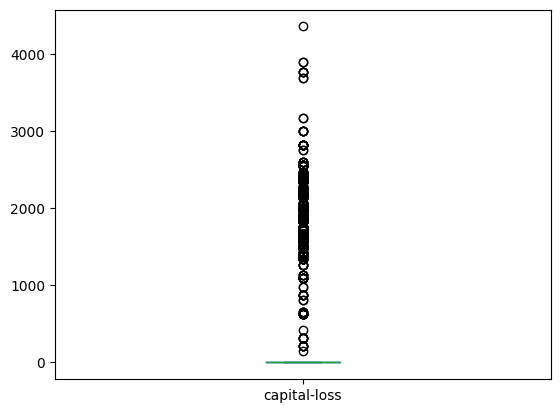

In [331]:
df['capital-loss'].plot(kind="box")

<Axes: >

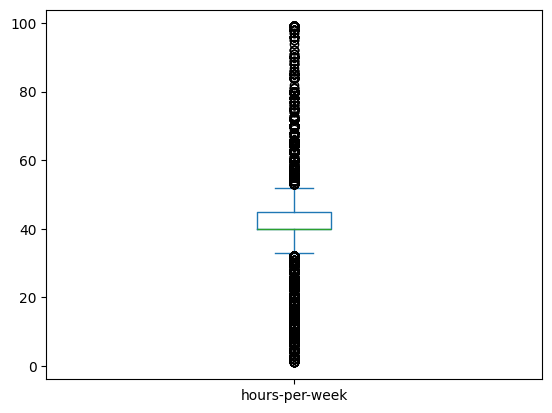

In [332]:
df['hours-per-week'].plot(kind="box")

In [333]:
from scipy.stats import skew

In [334]:
numeric_columns_continuos = ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']

In [335]:
for col in numeric_columns_continuos:
    print(col + " : " + str(df[col].skew()))

age : 0.5331975555292557
fnlwgt : 1.4445076260036125
capital-gain : 11.677728884276727
capital-loss : 4.511291429039911
hours-per-week : 0.3422597783289385


In [336]:
import seaborn as sns

<Axes: xlabel='capital-gain', ylabel='Density'>

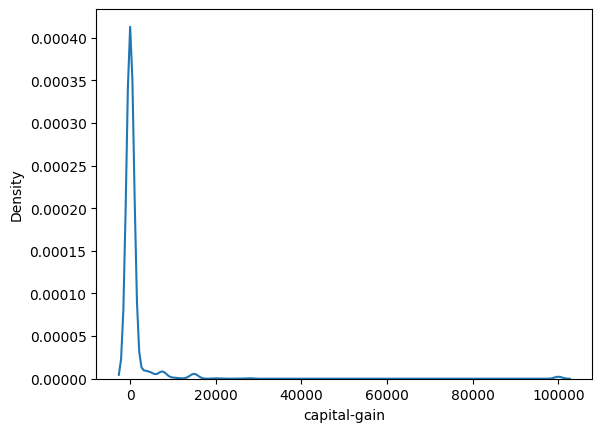

In [337]:
sns.kdeplot(df['capital-gain'])

<Axes: xlabel='capital-loss', ylabel='Density'>

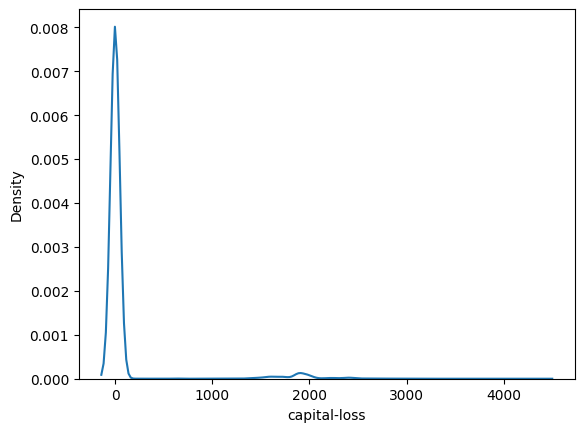

In [338]:
sns.kdeplot(df['capital-loss'])

<Axes: xlabel='hours-per-week', ylabel='Density'>

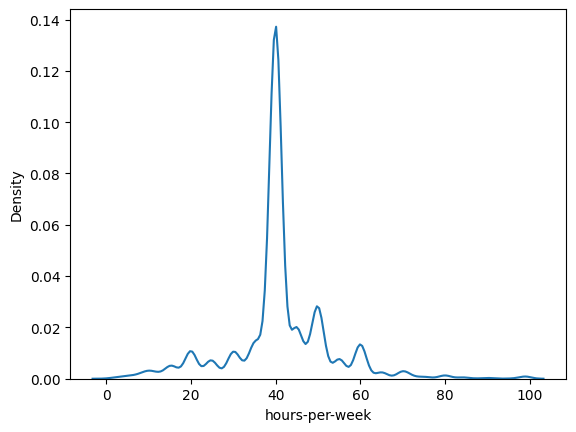

In [339]:
sns.kdeplot(df['hours-per-week'])

### Fixing skewness

In [340]:
from scipy.stats import yeojohnson
from sklearn.preprocessing import PowerTransformer

In [341]:
pt = PowerTransformer()

In [342]:
df_numeric_fixed_skew = pd.DataFrame(pt.fit_transform(df[numeric_columns]), columns=numeric_columns)

In [343]:
df_numeric_fixed_skew_continuous_only = pd.DataFrame(pt.fit_transform(df[numeric_columns_continuos]), columns=numeric_columns_continuos)

In [344]:
for col in df_numeric_fixed_skew_continuous_only:
    print(col + " : " + str(df_numeric_fixed_skew[col].skew()))

age : -0.01572168538627967
fnlwgt : 0.016511340064493906
capital-gain : 3.000395372937341
capital-loss : 4.258560562018539
hours-per-week : 0.23888904675028202


In [345]:
for col in df_numeric_fixed_skew:
    print(col + " : " + str(df_numeric_fixed_skew[col].skew()))

age : -0.01572168538627967
fnlwgt : 0.016511340064493906
educational-num : 0.022635422248334692
capital-gain : 3.000395372937341
capital-loss : 4.258560562018539
hours-per-week : 0.23888904675028202


### Encoding Object Column to Numeric

In [346]:
from sklearn.preprocessing import LabelEncoder

In [347]:
le = LabelEncoder()

In [348]:
df_object = df.select_dtypes(exclude=[np.number]).reset_index()
df_object.drop('index', inplace=True, axis = 1)

In [349]:
object_columns = [col for col in df_object.columns]

In [350]:
for col in df_object:
    df_object[col] = le.fit_transform(df_object[col])

### Concatenating and Saving all to one dataset

In [351]:
df_cleaned = pd.merge(df_numeric_fixed_skew, df_object, left_index=True, right_index=True)

In [352]:
df_numeric_fixed_skew_continuous_only.shape

(45985, 5)

In [353]:
dfNoMissingValue = pd.read_csv("adult(no missing value).csv")

In [354]:
df_cleaned_continuous = pd.merge(df_numeric_fixed_skew_continuous_only, dfNoMissingValue['educational-num'], left_index=True, right_index=True)

In [370]:
df_cleaned_continuous = pd.merge(df_cleaned_continuous, df_object, left_index=True, right_index=True)

In [371]:
df_cleaned_continuous.shape

(45985, 15)

In [356]:
df_cleaned.drop('education', inplace=True, axis = 1)

In [357]:
df_cleaned.corr()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass,marital-status,occupation,relationship,race,gender,native-country,income
age,1.000000,-0.068876,0.077423,0.120108,0.059380,0.155183,0.082426,-0.316016,-0.009194,-0.264985,0.020426,0.094867,-0.005992,0.264090
fnlwgt,-0.068876,1.000000,-0.036430,-0.006937,-0.001370,-0.021996,-0.038808,0.033363,-0.001201,0.009758,-0.019258,0.025525,-0.064020,-0.002772
educational-num,0.077423,-0.036430,1.000000,0.121047,0.080952,0.149024,0.045464,-0.064727,0.097944,-0.095811,0.028067,0.009604,0.077348,0.341418
capital-gain,0.120108,-0.006937,0.121047,1.000000,-0.067555,0.076734,0.014168,-0.059460,0.011315,-0.077814,0.021764,0.064397,0.011594,0.266369
capital-loss,0.059380,-0.001370,0.080952,-0.067555,1.000000,0.052019,0.005352,-0.036438,0.014081,-0.052891,0.018169,0.041942,0.006630,0.137491
hours-per-week,0.155183,-0.021996,0.149024,0.076734,0.052019,1.000000,0.048502,-0.182226,0.015129,-0.258722,0.041467,0.230573,0.007674,0.226999
workclass,0.082426,-0.038808,0.045464,0.014168,0.005352,0.048502,1.000000,-0.033574,0.017352,-0.064899,0.047952,0.069650,0.003959,0.015587
marital-status,-0.316016,0.033363,-0.064727,-0.059460,-0.036438,-0.182226,-0.033574,1.000000,0.016498,0.180829,-0.070095,-0.119997,-0.021665,-0.193370
occupation,-0.009194,-0.001201,0.097944,0.011315,0.014081,0.015129,0.017352,0.016498,1.000000,-0.051500,-0.001830,0.056954,-0.002247,0.048994
relationship,-0.264985,0.009758,-0.095811,-0.077814,-0.052891,-0.258722,-0.064899,0.180829,-0.051500,1.000000,-0.116698,-0.583914,-0.007281,-0.253425


### Correlation Matrix

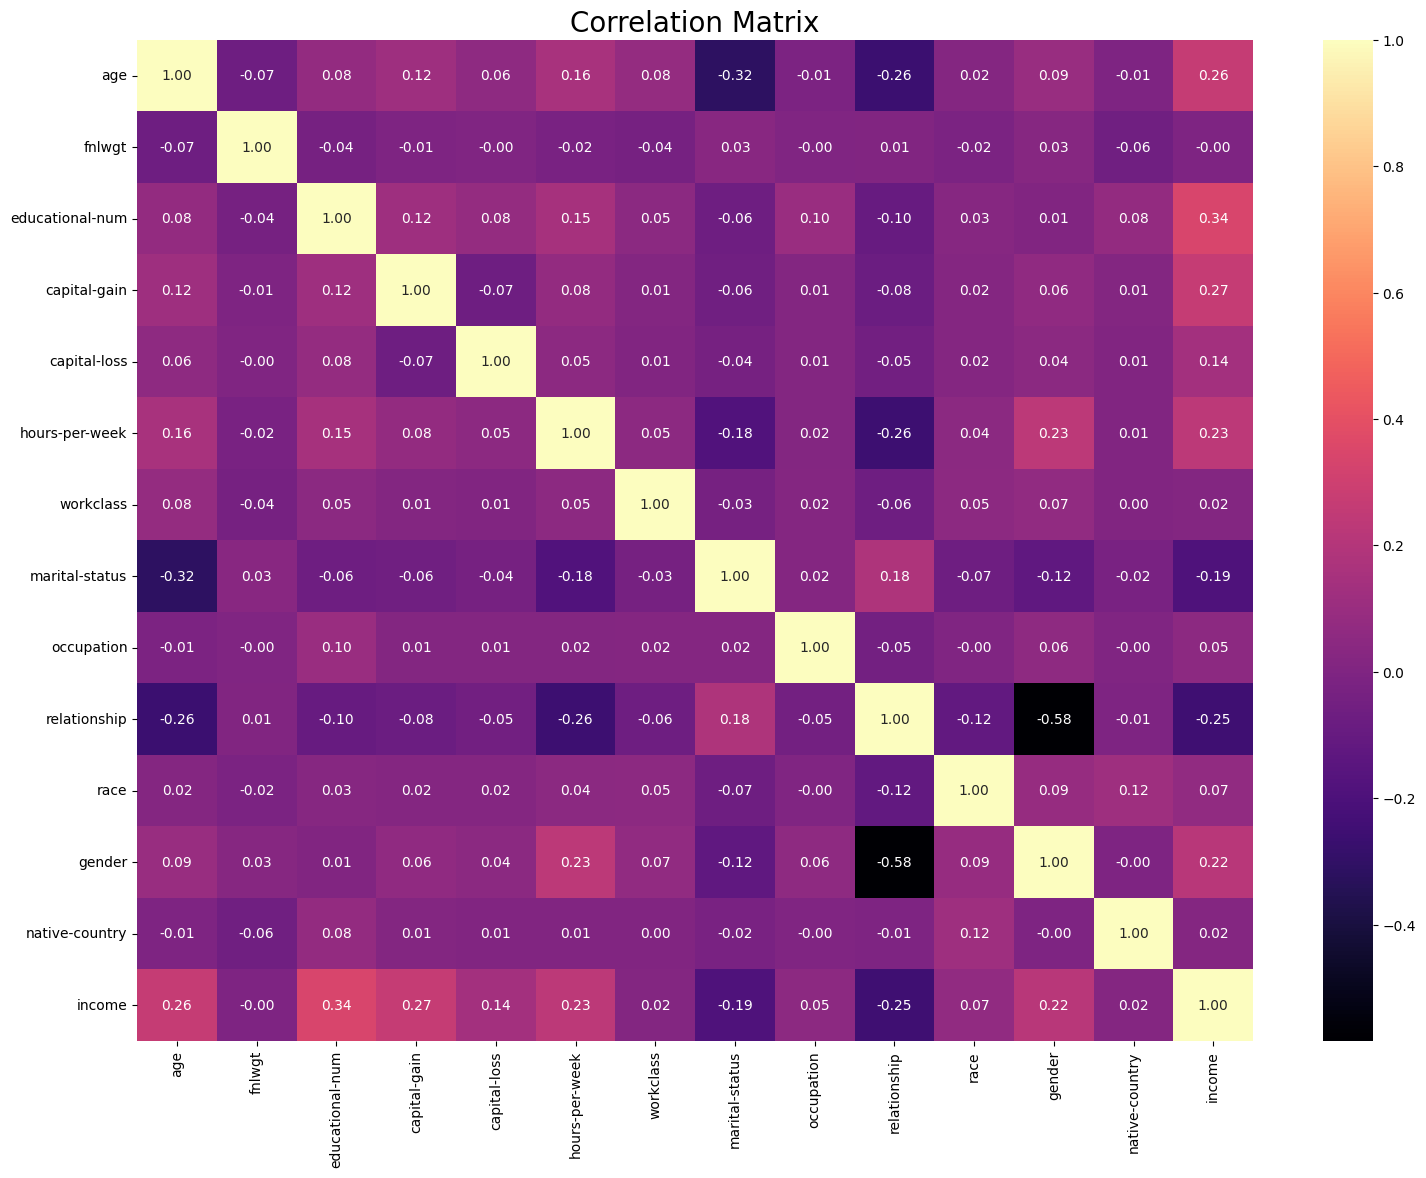

In [358]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df_cleaned.corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

### Importing to csv

In [372]:
df_cleaned.to_csv('adult(cleaned).csv', index=False)
df_cleaned_continuous.to_csv('adult(cleaned continuous only).csv', index=False)

In [360]:
df_cleaned.tail(1)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass,marital-status,occupation,relationship,race,gender,native-country,income
45984,1.031425,0.982888,-0.484707,3.303102,-0.223137,-0.072095,3,2,3,5,4,0,38,1


In [361]:
df_numeric = pd.DataFrame(df[numeric_columns], columns=numeric_columns)

In [362]:
df_cleaned_non_normalized = pd.merge(df_numeric, df_object, left_index=True, right_index=True)
df_cleaned_non_normalized.drop('education', inplace=True, axis = 1)

In [363]:
df_cleaned_non_normalized.to_csv('adult(cleaned non normalized).csv', index=False)

### All clean of skewness including encoded object columns

In [364]:
df_object_fix_skewness = pd.DataFrame(pt.fit_transform(df_object), columns=object_columns)

In [365]:
df_cleaned_all = pd.merge(df_numeric_fixed_skew, df_object_fix_skewness, left_index=True, right_index=True)

In [366]:
df_cleaned_all.drop('education', inplace=True, axis = 1)

In [367]:
df_cleaned_all.drop('income', inplace=True, axis = 1)

In [368]:
df_cleaned_all = pd.merge(df_cleaned_all, df_cleaned['income'], left_index=True, right_index=True)

In [369]:
df_cleaned_all.to_csv('adult(cleaned all column).csv', index=False)